In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

Once again, we make use of the Pokémon data for this exercise.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## TO DO **Task 1**
There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

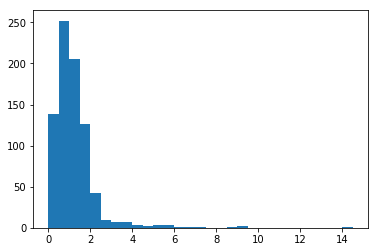

In [3]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

In [4]:
pokemon['height'].describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

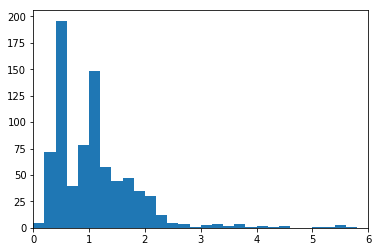

In [5]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

## Expected Output: TO DO Task 1

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


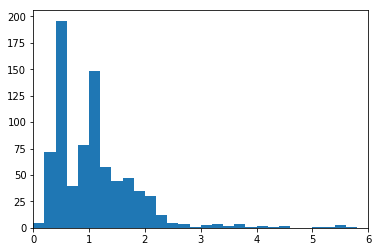

In [6]:
# run this cell to check your work against ours
scales_solution_1()

## TO DO **Task 2**
In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [7]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

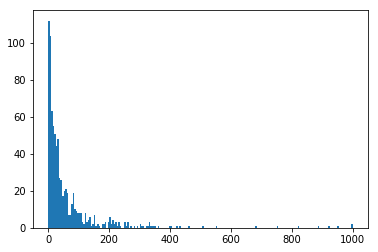

In [8]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['weight'].max()+5, 5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='weight', bins=bins);

Text(0.5,0,'The x-axis limits NOT are changed. They are only scaled to log-type')

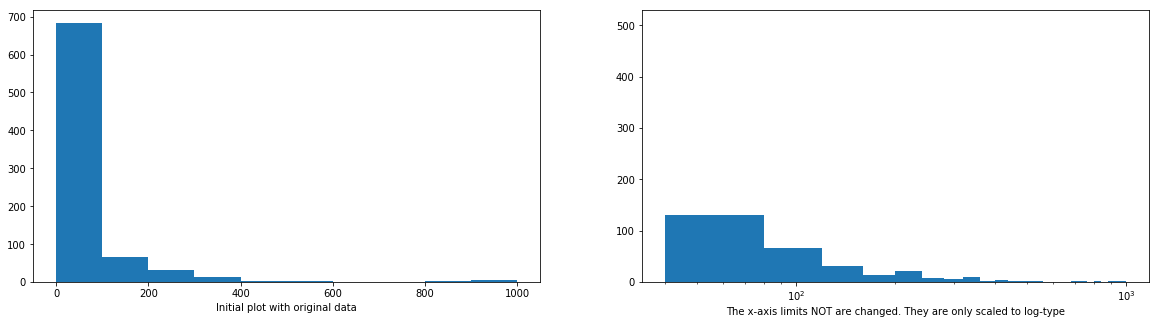

In [9]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

In [10]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5,0,'x-axis limits are changed, and scaled to log-type')

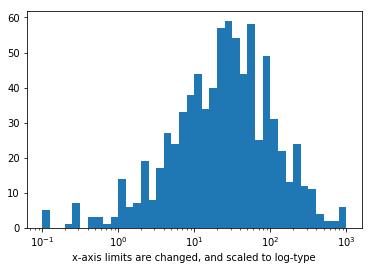

In [11]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

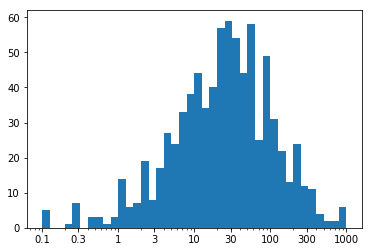

In [12]:

# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

Text(0.5,0,'Weight (kg)')

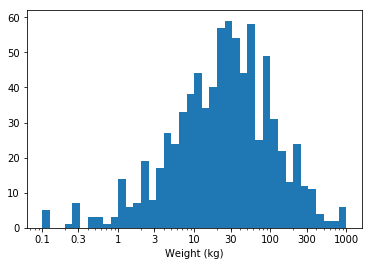

In [13]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')

## Expected Output: TO DO Task 2

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


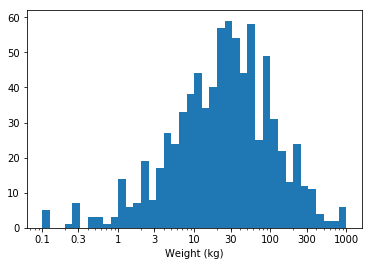

In [14]:
# run this cell to check your work against ours
scales_solution_2()